In [ ]:
# Use Autoencoder to Implement Anomaly Detection on Credit Card Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
df = pd.read_csv('Dataset/Credit Card Dataset/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = df.drop(['Time','Class'], axis=1)

In [4]:
x_train, x_test = train_test_split(df, test_size=0.2)

In [7]:
# Encoder
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

# DEcoder
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

# Autoencoder
autoencoder = tf.keras.models.Sequential([
    encoder,
    decoder
])    

In [8]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Fit the model on the training data
history = autoencoder.fit(
    x_train, x_train,
    validation_data = (x_test, x_test),
    epochs=10,
    batch_size=100,
    shuffle=True
)

Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 105.5610 - val_loss: 0.7711
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8447 - val_loss: 0.8748
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.6413 - val_loss: 0.6587
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.7601 - val_loss: 0.3600
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3535 - val_loss: 0.6237
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5360 - val_loss: 0.4082
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8466 - val_loss: 0.2009
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.8819 - val_loss: 0.1927
Epoch 9/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8380 - val_loss: 0.5326
Epoch 10/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4374 - val_loss: 0.5120


<Axes: >

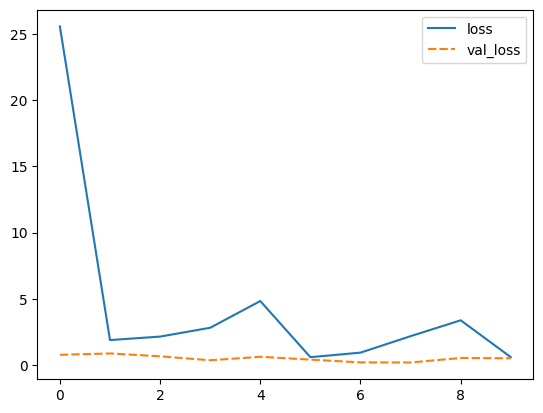

In [10]:
import seaborn as sns
sns.lineplot(autoencoder.history.history)

In [11]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [12]:
threshold = np.percentile(mse, 95)
threshold

np.float64(1.4101327080129975)

In [13]:
anomalies = mse > threshold

In [14]:
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies : {num_anomalies}")

Number of Anomalies : 2849


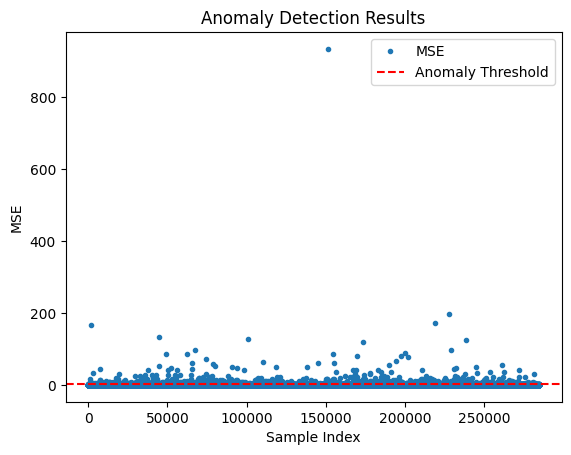

In [15]:
import matplotlib.pyplot as plt

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

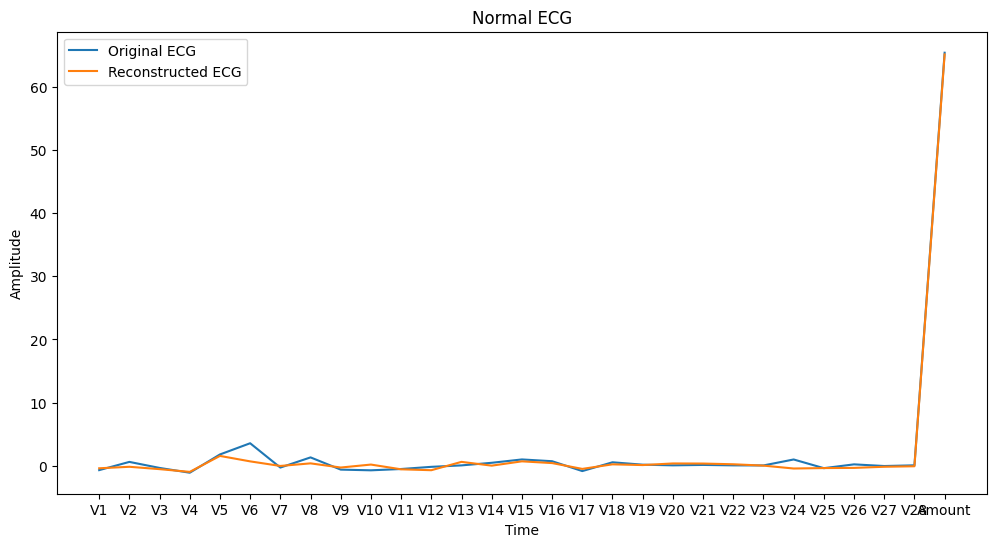

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

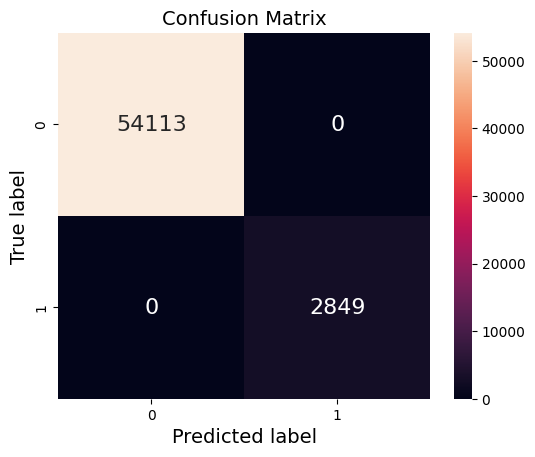

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()